**Наивный байесовский классификатор** (Naive Bayes Classifier, NBC)

Наивная байесовская классификация — это достаточно простой вероятностный алгоритм, основанный на том, что все признаки модели независимы.

$P(Спам \mid w_1, w_2, ..., w_n) \propto P(Спам) \cdot \prod^n_{i = 1} P(w_i \mid Спам)$

Вероятность того, что письмо является спамом при условии, что в нём есть определённые слова (которые мы обозначили), пропорциональна произведению двух значений:

* вероятности получения спама в целом (по сути, это доля спама в выборке);
* произведения вероятностей, что в письме есть некоторое слово $w_i$, если письмо является спамом, для всех слов выборки.

Давайте разберёмся с этим подробнее. Для каждого слова в сообщении мы рассчитываем вероятность того, что это слово окажется в спаме. В рамках нашей задачи рассматриваем следующие значения:
* $P(spam)$ - вероятность, что случайно взятое письмо будет спамом (также это доля спам-сообщений в нашем наборе данных)
* $P(w_i \mid spam)$ - вероятность того, что в сообщении будет определённое слово, если это письмо является спамом.

По той же логике можем определить:
* $P(not \ spam)$ - доля сообщений, которые не являются спамом
* $P(w_i \mid not \ spam)$ - вероятность того, что в сообщении будет определённое слово, если это письмо не является спамом

Теперь необходимо понять, как рассчитать вероятности каждого слова. Для этого в алгоритме используется следующая формула:
$P\left(w_{i} \mid S p a m\right)=\frac{N_{w_{i} \mid S p a m}+\alpha}{N_{S p a m}+\alpha \cdot N_{\text {Vocabulary }}}$

где:
* $N_{Vocabulary}$ - число уникальных слов в словаре (т.е. во всех наштх сообщениях=данных)
* $N_{Spam}$ - число слов в спам сообщениях
* $N_{w_i \mid Spam}$ - число повторений слова $w_i$ во всех спам-сообщениях в данных
* $\alpha$ - коэффициент для случаев, когда слово в сообщении отсутствует в нашем наборе данных

Кратко это можно объяснить так: вероятность того, что это слово встретится в спам сообщении, — это частота этого слова в «спамовой части» нашего набора данных (но с добавлением «сглаживания», чтобы учитывать ситуации, когда попадаются слова, которых не было в обучающей выборке).

**РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ**

Равномерное распределение — это распределение вероятностей, в качестве значений которого могут выступать любые целые числа от 1 до N, а вероятности их появления одинаковы.

$EX = (N+1)/2$

$DX = (N^2-1)/12$

In [1]:
import numpy as np
from scipy.stats import randint

In [2]:
# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)

Получаем вероятности для каждого из шести значений:

In [3]:
pmf

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого $x_i$ вероятность того, что случайная величина примет значение $x_i$ или меньше:

In [4]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)

print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.
Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [5]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1,251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49])

0.2


**РАСПРЕДЕЛЕНИЕ БЕРНУЛЛИ**

Распределение Бернулли, по сути, моделирует однократное подбрасывание «фальшивой» монеты. Это распределение вероятностей случайной величины, принимающей только два значения: 1 («успех») и 0 («неудача») с вероятностями p и 1-p соответственно. Таким образом, распределение Бернулли описывает события, имеющие ровно два исхода. Такие события повсеместно встречаются в реальной жизни (выиграет команда чемпионат или нет, сдаст студент экзамен или провалит его, распознает алгоритм объект на фото или нет).

$EX = p$

$DX = p(1-p)$

C:\Users\killr\AppData\Local\Temp\ipykernel_10876\2561418568.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


[Text(0.5, 0, 'Значение случайной величины'), Text(0, 0.5, 'Частота')]

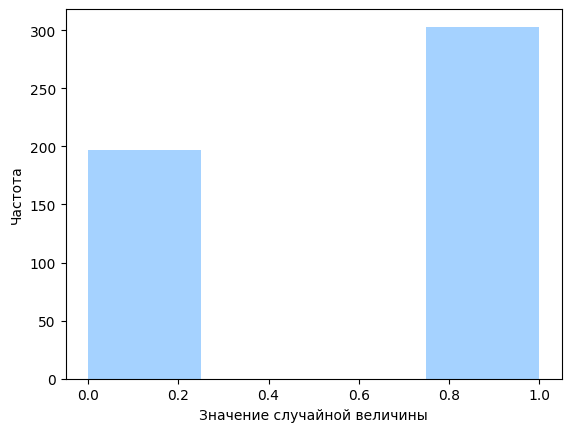

In [6]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500,p=0.6)
ax = sns.distplot(data,
                  kde = False,
                  color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

Также можно вывести количество неудач и попаданий в нашей модели:

In [7]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 197]
 [  1 303]]


**БИНОМИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ**

Биномиальным называют распределение, при котором возможны только два исхода (успех или неудача, выигрыш или проигрыш) и вероятность успеха и неудачи одинакова для всех испытаний. Однако исходы не обязательно должны быть равновероятными, и каждое испытание не зависит от других.

Параметры биномиального распределения — n и p, где n — общее количество испытаний, а p  — вероятность успеха в каждом испытании.

$P(X = k) = \begin{pmatrix} n \\ k \end{pmatrix} p^k (1-p)^{n-k}$

$EX = np$

$DX = np (1-p)$

Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.

Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?

In [8]:
import scipy

scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

0.6777995264

Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и получить результат. Например, можно смоделировать биноминальное распределение с параметром p = 0.5 и количеством испытаний, равным 10, и реализовать 1000 попыток:

C:\Users\killr\AppData\Local\Temp\ipykernel_10876\636377481.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)


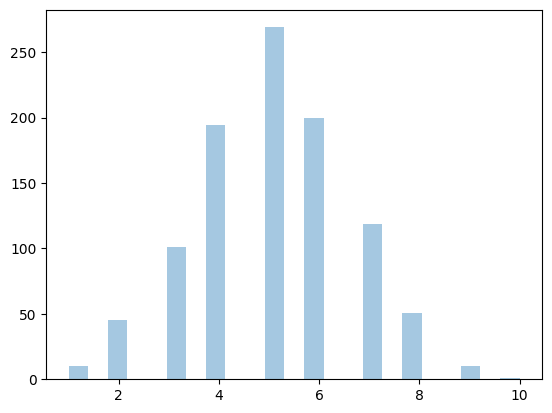

In [10]:
from numpy import random
import matplotlib.pyplot as plt

x = random.binomial(n=10, p=0.5, size=10)

sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)

plt.show()

**РАСПРЕДЕЛЕНИЕ ПУАССОНА**

Распределение Пуассона — это дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

$P(X = k) = \frac{\lambda^k e^{- \lambda}}{k!}$

$EX  = \lambda$

$DX  = \lambda$

In [11]:
import scipy

scipy.stats.distributions.poisson.pmf(5, 4.5)

0.17082685848611215

C:\Users\killr\AppData\Local\Temp\ipykernel_10876\2227624355.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.poisson(lam=3, size=1000), kde=False)


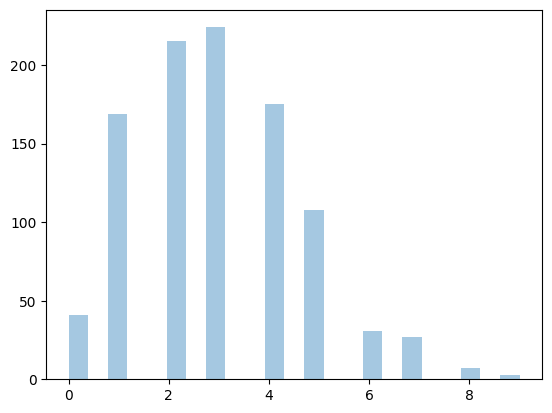

In [12]:
from numpy import random

sns.distplot(random.poisson(lam=3, size=1000), kde=False)

plt.show()